# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

In [4]:
x_train = np.array(x_train)

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

Linear Regression is a supervised Machine Learning algorithm it is also considered to be the most simple type of predictive Machine Learning algorithm.

we use the derivative of the cost function:

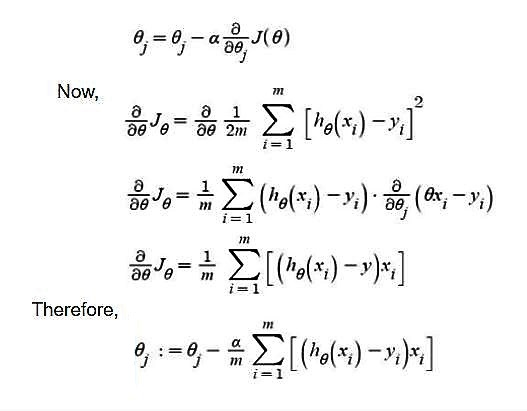

dw and db are calculated using derivative of cost function w.r.t w and b respecitively.

Steps:
- updated slope of best fit line using dw and learning rate for 1000 iterations (default).
- similarly, updated bias of best fit line using db and learning for 1000 iterations.
- finally forming the best fit line using **X.dw + db**

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [5]:
# implement Linear Regression
# implement Linear Regression
class LinearRegression:
  def __init__(self, lr=0.01, iteration=1000):
    self.lr = lr
    self.iteration = iteration
    self.weights = None
    self.bias = None
    self.threshold = 1e-6

  def derivative(self, num_samples, X, y_predict, y):
    dw = (2/num_samples) * np.dot(X.T,(y_predict - y))
    db = (2/num_samples) * np.sum(y_predict - y)
    return dw,db
  
  # def derivative2(self, n, x, y_predicted, y):
  #   # Calculating the gradients
  #   weight_derivative = -(2/n) * sum(x.T * (y-y_predicted))
  #   bias_derivative = -(2/n) * sum(y-y_predicted)
  #   return weight_derivative, bias_derivative

  def abs_diff(self, a, b):
    return abs(a - b)

  def fit(self, X, y):
    num_samples, num_features = X.shape
    self.weights = np.zeros(num_features)
    # self.lr /= num_samples
    self.bias = 0

    prev_cost = None

    for i in range(self.iteration):
      y_predict = np.dot(X,self.weights) + self.bias
      current_cost = mse(y, y_predict)

      if prev_cost and self.abs_diff(prev_cost, current_cost) <= self.threshold:
        break

      prev_cost = current_cost
      dw, db = self.derivative(num_samples,X,y_predict,y)
      
      #update weights and bias
      self.weights -= self.lr * dw
      self.bias -= self.lr * db
    
  def predict(self, X):
    y_predict = np.dot(X,self.weights) + self.bias
    return y_predict

#Cost Function
def mse(y_actual, y_pred):
  return np.mean((y_actual-y_pred)**2)

def rmse(y_actual,y_pred):
  return np.sqrt(mse(y_actual, y_pred))
      

In [ ]:
# Get the predictions of x_test into `y_pred`
# model = LinearRegression(iteration=1000)
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)

In [ ]:
# y_pred

In [ ]:
# plt.plot(y_test,label="Actual")
# plt.plot(y_pred,label="Predicted")
# plt.legend()
# plt.plot()

In [8]:
learning_rates = [0.01,0.05,0.1,0.3,0.5,0.7]
opt_lr = None
min_mse = 100000
opt_pred_y = None
arr_mse = list()
for lr in learning_rates:
  model = LinearRegression(lr=lr)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = mse(y_test,y_pred)
  if(temp_error<min_mse):
    min_mse = temp_error
    opt_lr = lr
    opt_pred_y = y_pred
  arr_mse.append(temp_error)


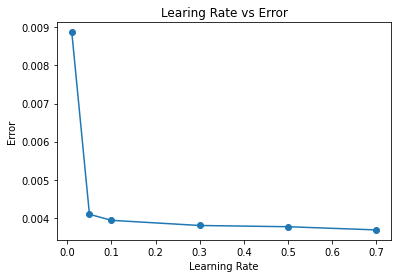

In [9]:
## Plot of mse vs learning rate
plt.plot(learning_rates,arr_mse, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title("Learing Rate vs Error")
plt.show()


In [10]:
print('optimum learning rate is', opt_lr)

optimum learning rate is 0.7


In [11]:
y_pred = opt_pred_y

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

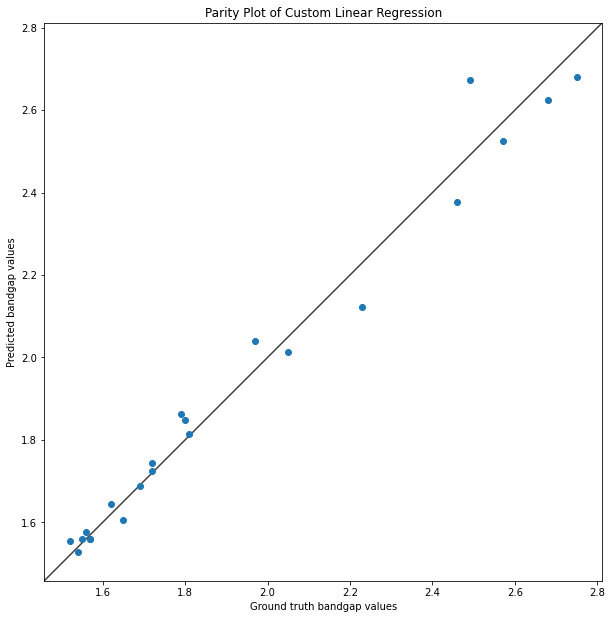

In [12]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS (Residual Sum of Squares) vs minimizing sum of square of coefficients. α can take various values:

- α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
- α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
- 0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

In [ ]:
import pandas as pd

In [ ]:
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas = [0.001, 0.01, 0.1,0.5, 1, 2, 3, 4, 10, 100, 1000, 10000]
df = pd.DataFrame()
df['alphas'] = alphas
arr_rmse = list()
for alpha in alphas:
  model = Ridge(alpha=alpha,solver = 'saga')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = rmse(y_test,y_pred)
  arr_rmse.append(temp_error)
df['rmse'] = arr_rmse

In [ ]:
df

,alphas,rmse
0,0.001,0.067202
1,0.010,0.067370
2,0.100,0.069291
3,0.500,0.085814
4,1.000,0.110773
5,2.000,0.159678
6,3.000,0.185959
7,4.000,0.210464
8,10.000,0.289544
9,100.000,0.418967


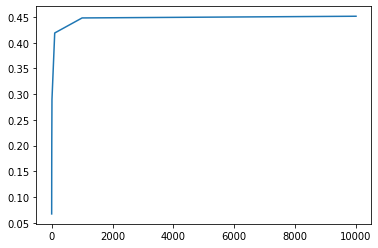

In [ ]:
plt.plot(alphas, arr_rmse)
plt.show()

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.



2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)
Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

- α = 0: Same coefficients as simple linear regression
- α = ∞: All coefficients zero (same logic as before)
- 0 < α < ∞: coefficients between 0 and that of simple linear regression

In [ ]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [ ]:
from sklearn.linear_model import Lasso

df = pd.DataFrame()
df['alphas'] = alphas
arr_rmse = list()
for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = rmse(y_test,y_pred)
  arr_rmse.append(temp_error)
df['rmse'] = arr_rmse

In [ ]:
df

,alphas,rmse
0,0.001,0.068403
1,0.010,0.091357
2,0.100,0.445636
3,0.500,0.451898
4,1.000,0.451898
5,2.000,0.451898
6,3.000,0.451898
7,4.000,0.451898
8,10.000,0.451898
9,100.000,0.451898


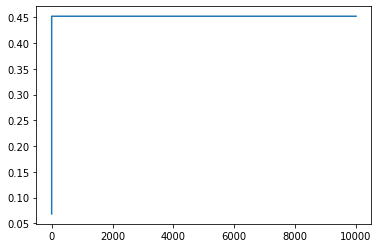

In [ ]:
plt.plot(alphas, arr_rmse)
plt.show()